In [1]:
#Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Reading the data

In [2]:
df = pd.read_csv('Egypt_Houses_Price.csv')

In [3]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [4]:
df.isna().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [5]:
df['Area'] = df['Area'].replace('Unknown', np.nan)
df['Bathrooms'] = df['Bathrooms'].replace('Unknown', np.nan)
df['Bedrooms'] = df['Bedrooms'].replace('Unknown', np.nan)
df['Price'] = df['Price'].replace('Unknown', np.nan)

In [6]:
df.isna().sum()

Type                0
Price              39
Bedrooms          239
Bathrooms         207
Area              507
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [7]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [8]:
df.isna().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Processing the data

fix the dtype

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25143 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25143 non-null  object
 1   Price           25143 non-null  object
 2   Bedrooms        25143 non-null  object
 3   Bathrooms       25143 non-null  object
 4   Area            25143 non-null  object
 5   Furnished       25143 non-null  object
 6   Level           25143 non-null  object
 7   Compound        25143 non-null  object
 8   Payment_Option  25143 non-null  object
 9   Delivery_Date   25143 non-null  object
 10  Delivery_Term   25143 non-null  object
 11  City            25143 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [11]:
df['Bedrooms'] = df['Bedrooms'].replace('10+', 11)
df['Bathrooms'] = df['Bathrooms'].replace('10+', 11)

In [12]:
df['Bedrooms'] = df['Bedrooms'].astype(float).astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(float).astype(int)
df['Area'] = df['Area'].astype(float).astype(int)
df['Price'] = df['Price'].astype(float).astype(int)

In [13]:
df.loc[(df['Type'] == 'Twin house'), 'Type'] = 'Twin House'
df.loc[(df['Type'] == 'Stand Alone Villa'), 'Type'] = 'Standalone Villa'

In [14]:
print(df['Type'].unique())
print(df['Level'].unique())

['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Chalet' 'Standalone Villa'
 'Twin House' 'Town House']
['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']


In [15]:
df[df['Level'] == 'Unknown'].isna().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [16]:
df[df['Level'] == 'Unknown']['Type'].unique()

array(['Chalet', 'Standalone Villa', 'Twin House', 'Town House', 'Duplex',
       'Studio', 'Penthouse'], dtype=object)

In [17]:
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Duplex')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Apartment')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Studio')].index)

In [18]:
df.loc[(df['Level'] == '10+', 'Level')] = 11
df.loc[(df['Level'] == 'Highest', 'Level')] = 12
df.loc[(df['Level'] == 'Ground', 'Level')] = 0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25110 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25110 non-null  object
 1   Price           25110 non-null  int32 
 2   Bedrooms        25110 non-null  int32 
 3   Bathrooms       25110 non-null  int32 
 4   Area            25110 non-null  int32 
 5   Furnished       25110 non-null  object
 6   Level           25110 non-null  object
 7   Compound        25110 non-null  object
 8   Payment_Option  25110 non-null  object
 9   Delivery_Date   25110 non-null  object
 10  Delivery_Term   25110 non-null  object
 11  City            25110 non-null  object
dtypes: int32(4), object(8)
memory usage: 2.1+ MB


In [20]:
df.loc[(df['Type'] == 'Chalet') | (df['Type'] == 'Standalone Villa') | (df['Type'] == 'Twin House') | (df['Type'] == 'Town House'), 'Level'] = 0

In [21]:
df.loc[(df['Type'] == 'Penthouse'), 'Level'] = 12

In [22]:
df['Level'] = df['Level'].astype(float).astype(int)

In [23]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,11,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,0,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [24]:
df.loc[(df['Furnished'] == 'Unknown')&(df['Delivery_Date'] != 'Unknown')&(df['Delivery_Date'] != 'Ready to move')]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
9,Apartment,992800,3,2,146,Unknown,3,Unknown,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
64,Apartment,1396000,3,3,179,Unknown,0,Unknown,Cash or Installment,2024,Semi Finished,6th of October
67,Apartment,1805000,2,2,105,Unknown,0,Kayan,Installment,2024,Semi Finished,Sheikh Zayed
76,Apartment,1526400,3,2,212,Unknown,2,Beit Al Watan,Installment,2023,Semi Finished,New Damietta
83,Apartment,1648000,3,3,160,Unknown,3,Midtown Condo,Cash or Installment,2023,Core & Shell,New Capital City
...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Town House,7100000,5,4,285,Unknown,0,Lake West,Cash or Installment,soon,Semi Finished,Sheikh Zayed
27247,Town House,300000,4,4,220,Unknown,0,Mountain View 2,Cash or Installment,2025,Not Finished,New Cairo - El Tagamoa
27275,Twin House,4500000,3,2,200,Unknown,0,The Crown,Cash or Installment,soon,Semi Finished,Sheikh Zayed
27276,Twin House,4900000,4,3,317,Unknown,0,The Crown,Cash or Installment,soon,Unknown,Sheikh Zayed


In [25]:
df.loc[(df['Furnished'] == 'Unknown')&(df['Delivery_Term'] != 'Unknown')&(df['Delivery_Term'] != 'Finished'), 'Furnished'] = 'No'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25110 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25110 non-null  object
 1   Price           25110 non-null  int32 
 2   Bedrooms        25110 non-null  int32 
 3   Bathrooms       25110 non-null  int32 
 4   Area            25110 non-null  int32 
 5   Furnished       25110 non-null  object
 6   Level           25110 non-null  int32 
 7   Compound        25110 non-null  object
 8   Payment_Option  25110 non-null  object
 9   Delivery_Date   25110 non-null  object
 10  Delivery_Term   25110 non-null  object
 11  City            25110 non-null  object
dtypes: int32(5), object(7)
memory usage: 2.0+ MB


In [27]:
for x in df.columns:
    z = len(df[df[x] == 'Unknown'])/len(df)
    print(x,'has', z)

Type has 0.0
Price has 0.0
Bedrooms has 0.0
Bathrooms has 0.0
Area has 0.0
Furnished has 0.1426921545201115
Level has 0.0
Compound has 0.4048984468339307
Payment_Option has 0.0
Delivery_Date has 0.3637594583831143
Delivery_Term has 0.0
City has 0.0


In [28]:
df = df.drop('Compound', 1)
df = df.drop('Delivery_Date', 1)

C:\Users\GAMING~1\AppData\Local\Temp/ipykernel_27756/2020012257.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Compound', 1)
C:\Users\GAMING~1\AppData\Local\Temp/ipykernel_27756/2020012257.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Delivery_Date', 1)


In [29]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Cash,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa


In [30]:
df['Furnished'] = df['Furnished'].replace('Unknown', np.nan)
df['Delivery_Term'] = df['Delivery_Term'].replace('Unknown ', np.nan)
df.dropna(inplace = True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,17143.0,4.770506e+06,5.813112e+06,30000.0,1384000.0,3000000.0,6184224.5,205000000.0
Bedrooms,17143.0,3.264248e+00,1.162278e+00,1.0,3.0,3.0,4.0,11.0
Bathrooms,17143.0,2.848276e+00,1.324900e+00,1.0,2.0,3.0,4.0,11.0
Area,17143.0,2.364909e+02,1.635621e+02,10.0,127.0,183.0,285.0,995.0
Level,17143.0,1.282856e+00,2.573836e+00,0.0,0.0,0.0,2.0,12.0


In [32]:
df['City'].value_counts()

New Cairo - El Tagamoa    4239
North Coast               3413
Sheikh Zayed              1568
6th of October            1228
Madinaty                  1129
                          ... 
New Beni Suef                1
Darb al-Ahmar                1
Banha                        1
Quesna                       1
Abu Rawash                   1
Name: City, Length: 169, dtype: int64

In [33]:
ind = df['City'].value_counts(dropna = False).keys().tolist()
val = df['City'].value_counts(dropna = False).tolist()
value_dict = list(zip(ind, val))

In [34]:
ind

['New Cairo - El Tagamoa',
 'North Coast',
 'Sheikh Zayed',
 '6th of October',
 'Madinaty',
 'Ain Sukhna',
 'Rehab City',
 'New Capital City',
 'Shorouk City',
 'Nasr City',
 'Mokattam',
 'Ras Sedr',
 'Alamein',
 'Obour City',
 'Mostakbal City',
 'Hadayek 6th of October',
 'Borg al-Arab',
 'Nakheel',
 'Smoha',
 'Maadi',
 'Zahraa Al Maadi',
 'Hurghada',
 'Hadayek al-Ahram',
 'Heliopolis',
 'Badr City',
 'Agami',
 'New Heliopolis',
 'Haram',
 'Mansura',
 'Katameya',
 'Sidi Beshr',
 'Faisal',
 'Marsa Matrouh',
 'Mohandessin',
 '(View phone number)',
 'Sheraton',
 'Miami',
 'New Mansoura',
 'New Nozha',
 'Laurent',
 'Sharm al-Sheikh',
 'Gouna',
 'Moharam Bik',
 'Dokki',
 '10th of Ramadan',
 'Seyouf',
 'Gesr Al Suez',
 'Mandara',
 'Kafr Abdo',
 'New Damietta',
 'Asafra',
 'Asyut City',
 'Glim',
 'Ismailia City',
 'Helmeyat El Zaytoun',
 'Ain Shams',
 'Saba Pasha',
 'West Somid',
 'Tanta',
 'Dabaa',
 'Hadayek al-Kobba',
 'Shubra',
 'Giza District',
 'Zamalek',
 '15 May City',
 'Zagazig',
 'A

In [35]:
val

[4239,
 3413,
 1568,
 1228,
 1129,
 991,
 525,
 505,
 504,
 257,
 154,
 142,
 139,
 132,
 122,
 122,
 98,
 96,
 90,
 86,
 84,
 82,
 76,
 73,
 71,
 59,
 54,
 48,
 43,
 37,
 34,
 34,
 33,
 29,
 28,
 27,
 26,
 21,
 21,
 21,
 21,
 20,
 20,
 19,
 18,
 18,
 17,
 17,
 16,
 15,
 15,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 12,
 12,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [36]:
lc_sm = []
y = 'Less'
for ind, val in value_dict:
    if val <= 5:
        lc_sm.append(ind)
    else:
        pass
def lcdlt(x):
    if x in lc_sm:
        return y
    else:
        return x

In [37]:
df['City'] = df['City'].apply(lcdlt)

In [38]:
df = df.drop(df[df['City'] == 'Less'].index)

In [39]:
df['City'].value_counts()

New Cairo - El Tagamoa    4239
North Coast               3413
Sheikh Zayed              1568
6th of October            1228
Madinaty                  1129
                          ... 
Sahl Hasheesh                6
Azarita                      6
Gianaclis                    6
Imbaba                       6
San Stefano                  6
Name: City, Length: 85, dtype: int64

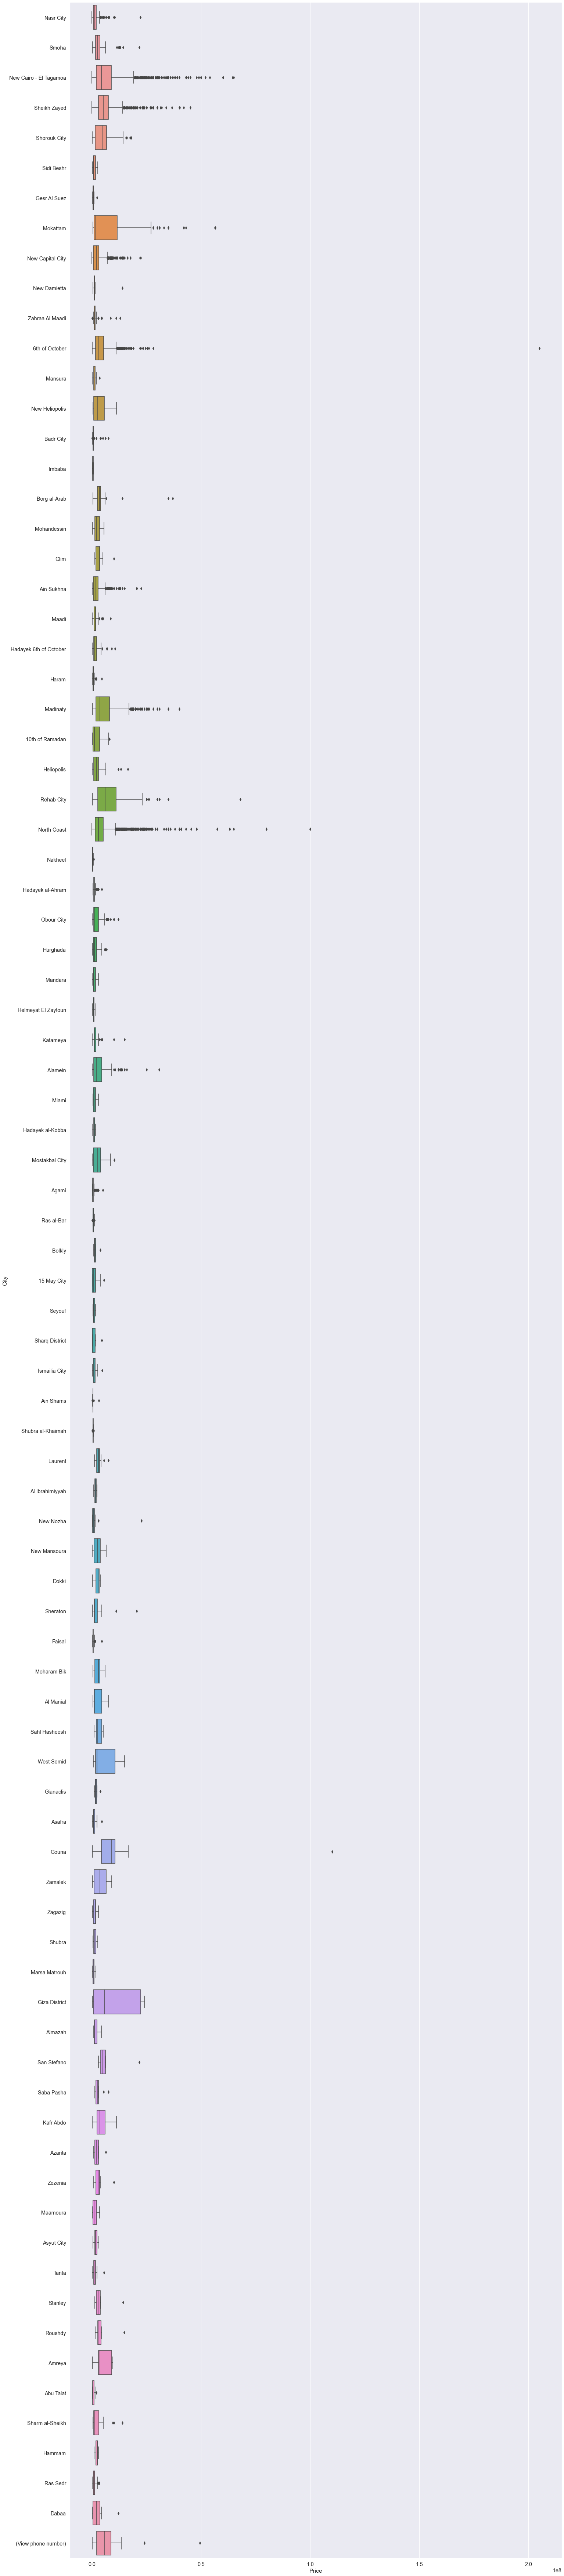

In [40]:
plt.subplots(figsize=(24, 128))
sns.boxplot(y='City', x='Price',data=df);

In [41]:
lcc = df['City'].unique()

In [42]:
lcc

array(['Nasr City', 'Smoha', 'New Cairo - El Tagamoa', 'Sheikh Zayed',
       'Shorouk City', 'Sidi Beshr', 'Gesr Al Suez', 'Mokattam',
       'New Capital City', 'New Damietta', 'Zahraa Al Maadi',
       '6th of October', 'Mansura', 'New Heliopolis', 'Badr City',
       'Imbaba', 'Borg al-Arab', 'Mohandessin', 'Glim', 'Ain Sukhna',
       'Maadi', 'Hadayek 6th of October', 'Haram', 'Madinaty',
       '10th of Ramadan', 'Heliopolis', 'Rehab City', 'North Coast',
       'Nakheel', 'Hadayek al-Ahram', 'Obour City', 'Hurghada', 'Mandara',
       'Helmeyat El Zaytoun', 'Katameya', 'Alamein', 'Miami',
       'Hadayek al-Kobba', 'Mostakbal City', 'Agami', 'Ras al-Bar',
       'Bolkly', '15 May City', 'Seyouf', 'Sharq District',
       'Ismailia City', 'Ain Shams', 'Shubra al-Khaimah', 'Laurent',
       'Al Ibrahimiyyah', 'New Nozha', 'New Mansoura', 'Dokki',
       'Sheraton', 'Faisal', 'Moharam Bik', 'Al Manial', 'Sahl Hasheesh',
       'West Somid', 'Gianaclis', 'Asafra', 'Gouna', 'Zamalek

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16954 entries, 0 to 17142
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            16954 non-null  object
 1   Price           16954 non-null  int32 
 2   Bedrooms        16954 non-null  int32 
 3   Bathrooms       16954 non-null  int32 
 4   Area            16954 non-null  int32 
 5   Furnished       16954 non-null  object
 6   Level           16954 non-null  int32 
 7   Payment_Option  16954 non-null  object
 8   Delivery_Term   16954 non-null  object
 9   City            16954 non-null  object
dtypes: int32(5), object(5)
memory usage: 1.6+ MB


In [44]:
for x in lcc:
    Q1 = df[df['City'] == x]['Price'].quantile(0.25)
    Q3 = df[df['City'] == x]['Price'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.1 * IQR
    lower_bound = Q1 - 1.1 * IQR
    df = df.drop(df[(df['City'] == x)&(df['Price'] > upper_bound)].index)
    df = df.drop(df[(df['City'] == x)&(df['Price'] < lower_bound)].index)

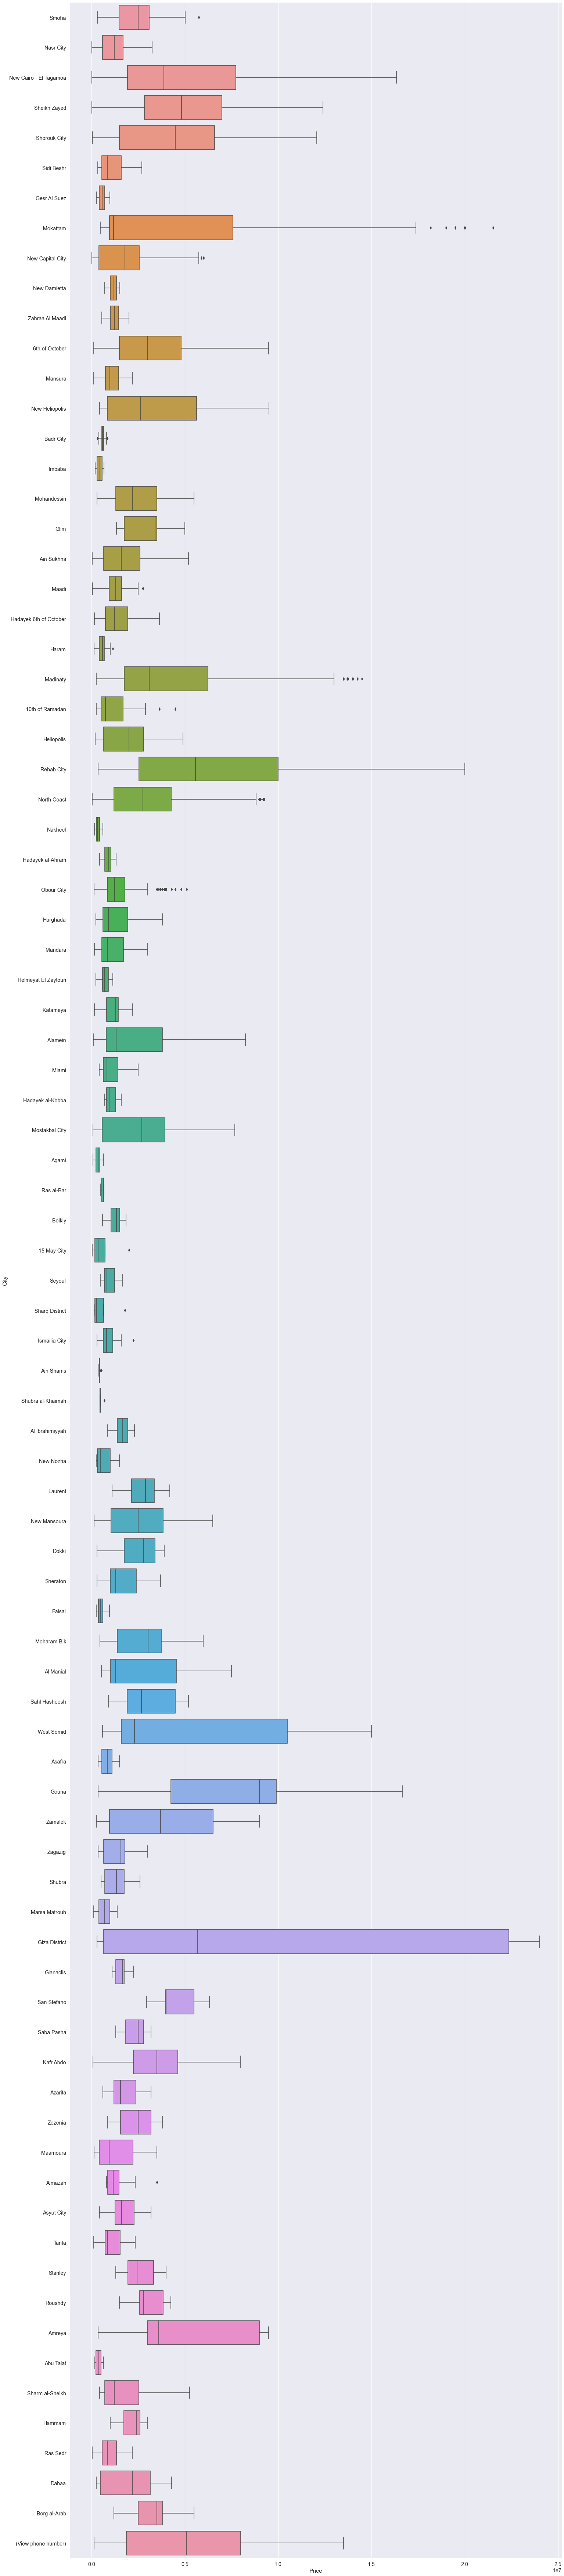

In [45]:
plt.subplots(figsize=(24, 128))
sns.boxplot(y='City', x='Price',data=df);

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15576 entries, 2 to 17142
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            15576 non-null  object
 1   Price           15576 non-null  int32 
 2   Bedrooms        15576 non-null  int32 
 3   Bathrooms       15576 non-null  int32 
 4   Area            15576 non-null  int32 
 5   Furnished       15576 non-null  object
 6   Level           15576 non-null  int32 
 7   Payment_Option  15576 non-null  object
 8   Delivery_Term   15576 non-null  object
 9   City            15576 non-null  object
dtypes: int32(5), object(5)
memory usage: 1.5+ MB


In [47]:
df=df.drop(df[df['City']=='(View phone number)'].index)

In [48]:
df.reset_index(inplace = True)

In [49]:
df

,index,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,2,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
1,3,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
2,4,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa
3,5,Apartment,1844900,4,3,222,No,1,Cash or Installment,Semi Finished,New Cairo - El Tagamoa
4,6,Duplex,3900000,5,5,290,No,12,Unknown Payment,Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...
15545,17137,Standalone Villa,5500000,5,4,364,No,0,Cash or Installment,Semi Finished,North Coast
15546,17138,Twin House,12284000,4,4,337,No,0,Cash or Installment,Not Finished,Sheikh Zayed
15547,17140,Standalone Villa,16000000,5,5,530,No,0,Cash,Finished,New Cairo - El Tagamoa
15548,17141,Standalone Villa,4800000,4,3,165,No,0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa


In [50]:
df.drop(['index'], axis = 1, inplace = True)

In [51]:
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
1,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
2,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa
3,Apartment,1844900,4,3,222,No,1,Cash or Installment,Semi Finished,New Cairo - El Tagamoa
4,Duplex,3900000,5,5,290,No,12,Unknown Payment,Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...
15545,Standalone Villa,5500000,5,4,364,No,0,Cash or Installment,Semi Finished,North Coast
15546,Twin House,12284000,4,4,337,No,0,Cash or Installment,Not Finished,Sheikh Zayed
15547,Standalone Villa,16000000,5,5,530,No,0,Cash,Finished,New Cairo - El Tagamoa
15548,Standalone Villa,4800000,4,3,165,No,0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa


In [52]:
df = df.drop(df[(df['Area']<=100)&(df['Bedrooms']>=4)].index)
df = df.drop(df[(df['Area']<=30)&(df['Type']!='Studio')].index)

In [53]:
df = df.drop(df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option'] == 'Cash')&(df['Delivery_Term'] == 'Finished')].index)

In [54]:
def Price_range(x):
    if x <= 1000000:
        return 'Low Price'
    elif x >= 3000000:
        return 'High Price'
    else:
        return 'Medium Price'

In [55]:
df['Price Range'] = df['Price'].apply(Price_range)

In [56]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price Range
0,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha,Medium Price
1,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City,Medium Price
2,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa,High Price
3,Apartment,1844900,4,3,222,No,1,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,Medium Price
4,Duplex,3900000,5,5,290,No,12,Unknown Payment,Finished,New Cairo - El Tagamoa,High Price


In [57]:
df.groupby('Price Range')['Payment_Option'].value_counts()

Price Range   Payment_Option     
High Price    Cash                   3208
              Cash or Installment    2142
              Installment            1368
              Unknown Payment         520
Low Price     Cash or Installment    1794
              Cash                    851
              Installment             351
              Unknown Payment         116
Medium Price  Cash or Installment    1967
              Cash                   1904
              Installment            1012
              Unknown Payment         280
Name: Payment_Option, dtype: int64

In [58]:
for col in df.columns:
    print(col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(7))
    print('\n'+'*'*20+'\n')

Type : 8
Apartment           5580
Chalet              3466
Standalone Villa    2141
Town House          1831
Twin House          1432
Duplex               573
Penthouse            352
Name: Type, dtype: int64

********************

Price : 2987
3500000    219
3000000    192
2500000    181
4500000    169
1500000    161
2000000    160
5000000    159
Name: Price, dtype: int64

********************

Bedrooms : 11
3    7143
2    3218
4    3051
5    1146
1     564
6     282
7      63
Name: Bedrooms, dtype: int64

********************

Bathrooms : 11
2    5218
3    4586
4    2370
1    2139
5     887
6     226
7      53
Name: Bathrooms, dtype: int64

********************

Area : 596
120    383
125    329
200    326
150    320
100    306
110    250
170    247
Name: Area, dtype: int64

********************

Furnished : 2
No     13977
Yes     1536
Name: Furnished, dtype: int64

********************

Level : 13
0     10085
2      1472
3      1137
1       991
4       506
12      396
5       350
Nam

Text(0.5, 1.0, 'Cities with the most Buildings')

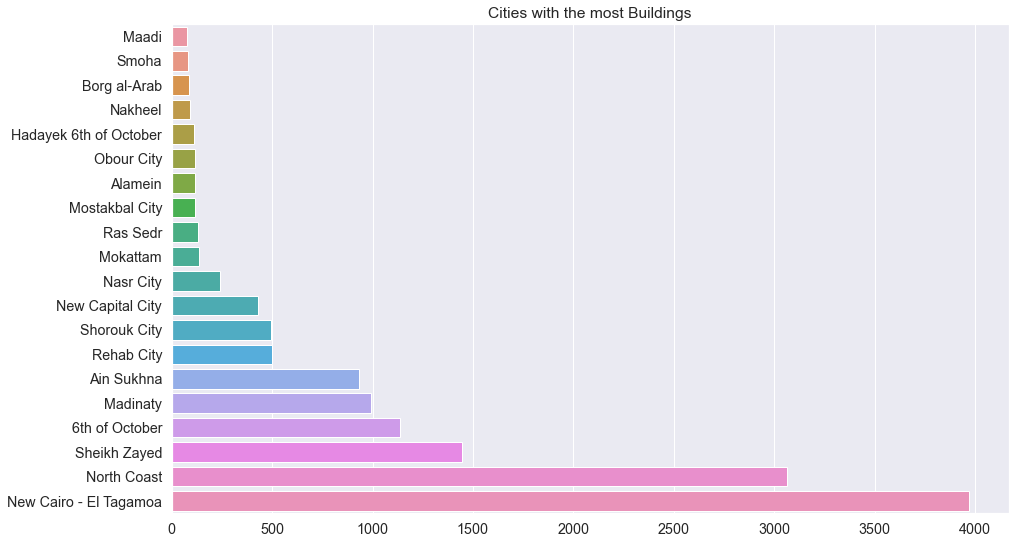

In [59]:
mp = df['City'].value_counts()[0:20].sort_values()
sns.barplot(y=mp.index, x=mp.values)
plt.title('Cities with the most Buildings')

Text(0.5, 1.0, 'Cities with the most prices')

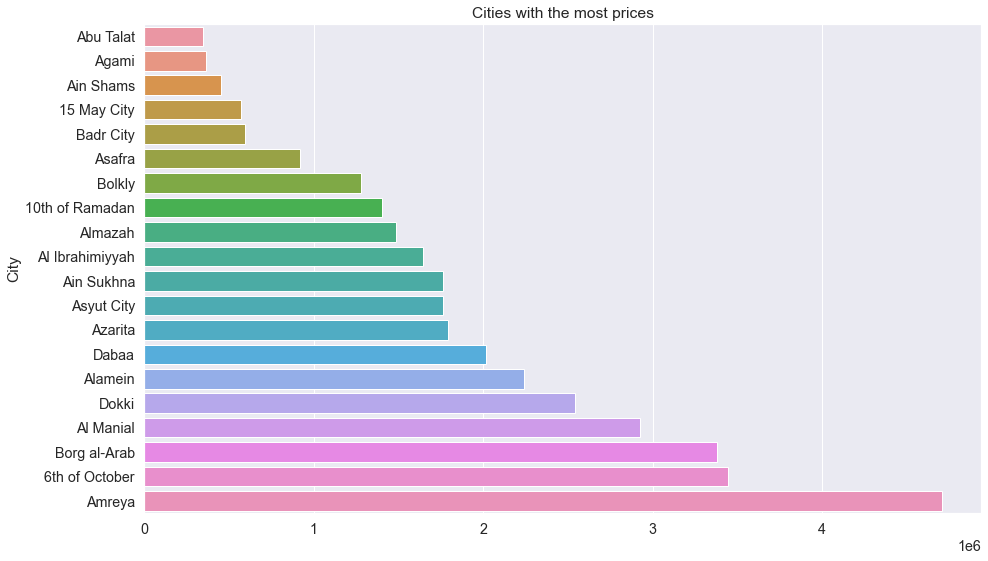

In [60]:
lmp = df.groupby('City')['Price'].mean()[0:20].sort_values()
sns.barplot(y=lmp.index, x=lmp.values)
plt.title('Cities with the most prices')

Text(0.5, 1.0, 'Types with the most prices')

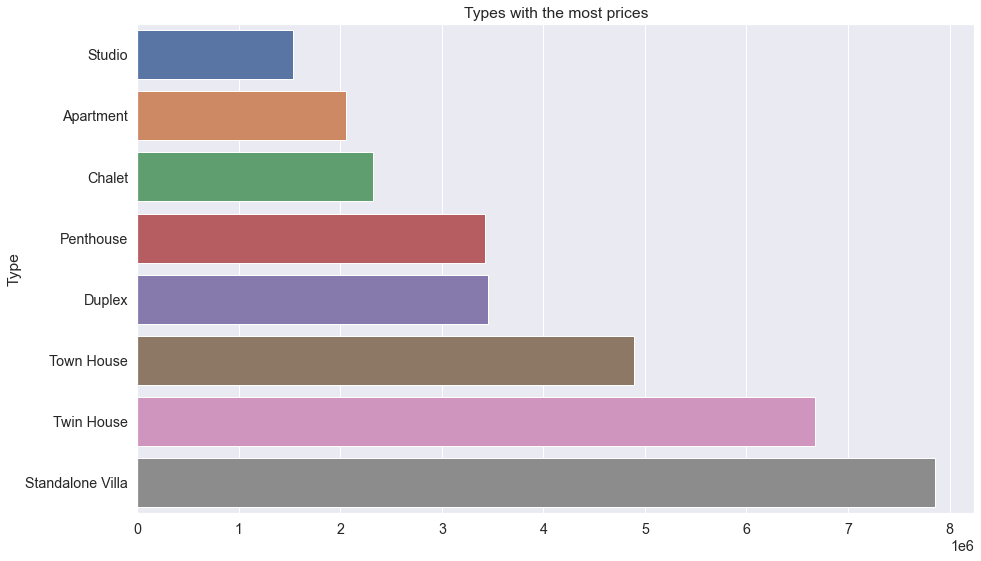

In [61]:
xmp = df.groupby('Type')['Price'].mean()[0:20].sort_values()
sns.barplot(y=xmp.index, x=xmp.values)
plt.title('Types with the most prices')

Text(0.5, 1.0, 'Property With Mean Bed Room Number')

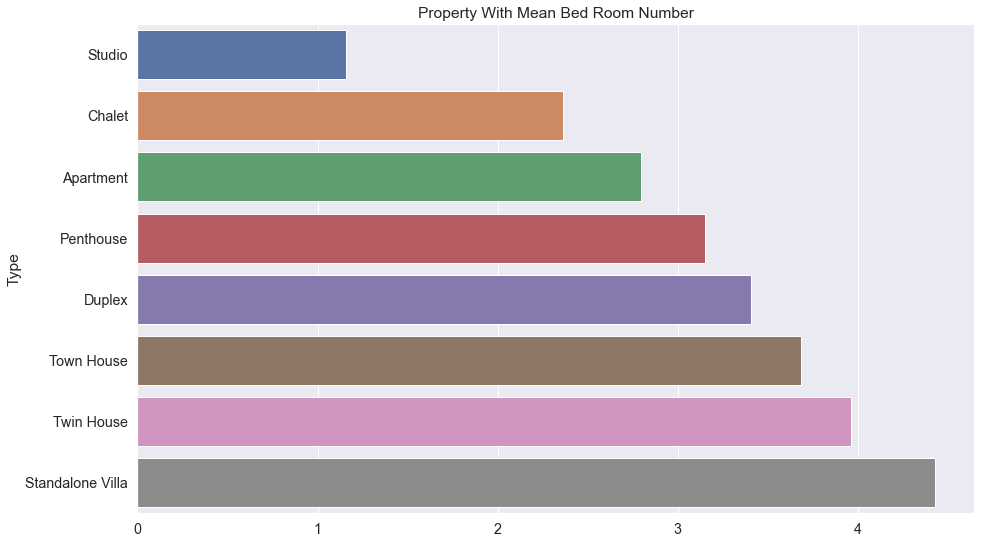

In [62]:
xmp = df.groupby('Type')['Bedrooms'].mean()[0:20].sort_values()
sns.barplot(y=xmp.index, x=xmp.values)
plt.title('Property With Mean Bed Room Number')

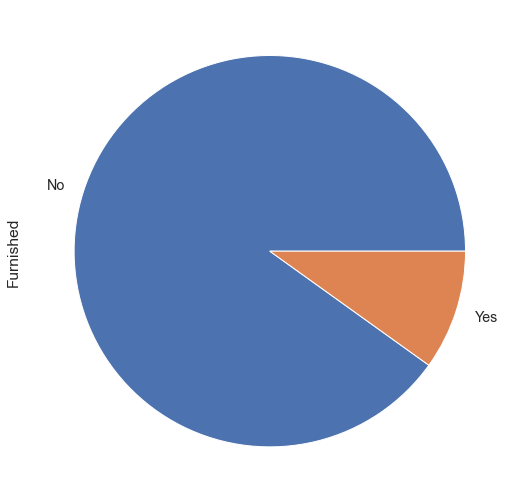

In [63]:
df['Furnished'].value_counts().plot(kind='pie');

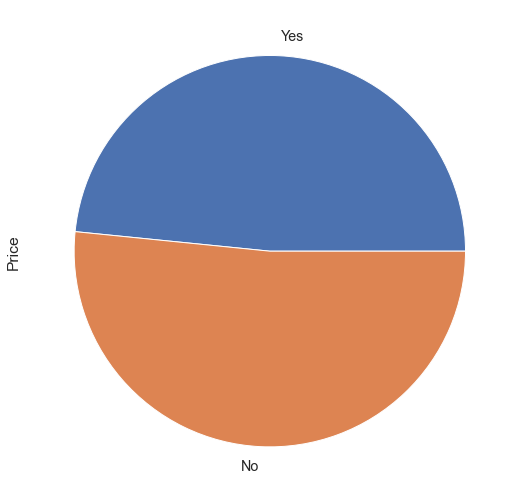

In [64]:
df.groupby('Furnished')['Price'].mean().sort_values().plot(kind='pie');

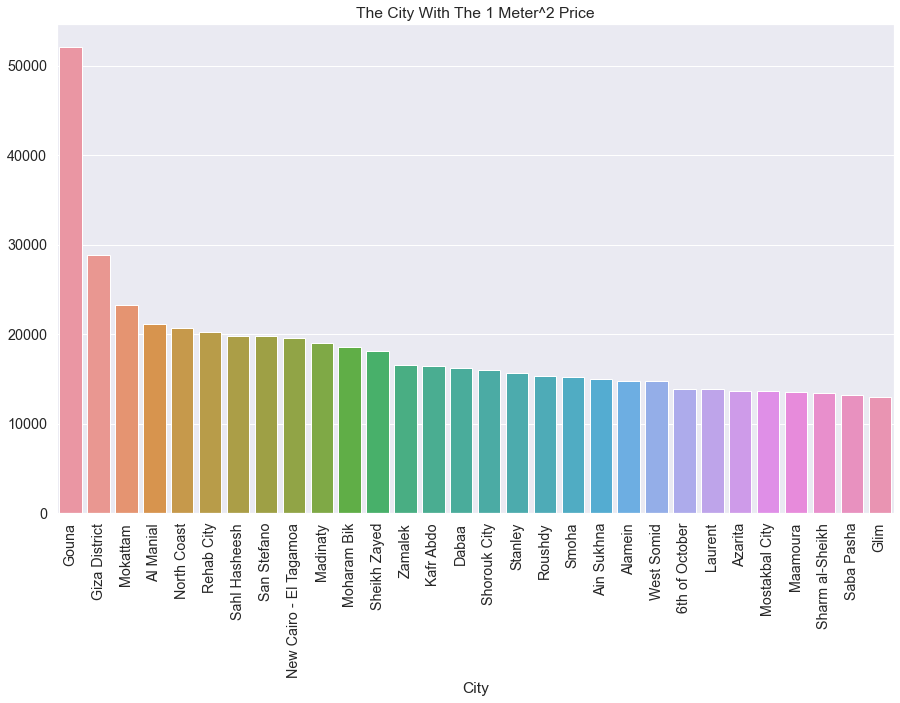

In [65]:
ind = (df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending = False)[0:30].index
val = (df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending = False)[0:30].values
sns.barplot(data = df, x = ind ,y= val ,ci = None,order = ind);
plt.xticks(rotation=90);
plt.title('The City With The 1 Meter^2 Price');

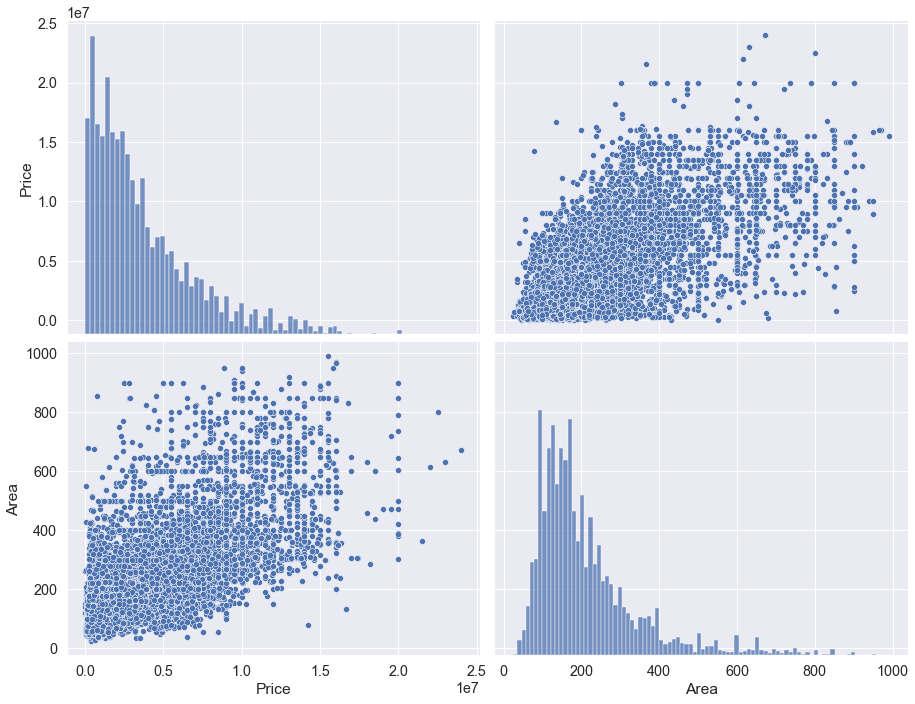

In [66]:
sns.pairplot(df, vars = ['Price', 'Area'], height=5, aspect=1.3);

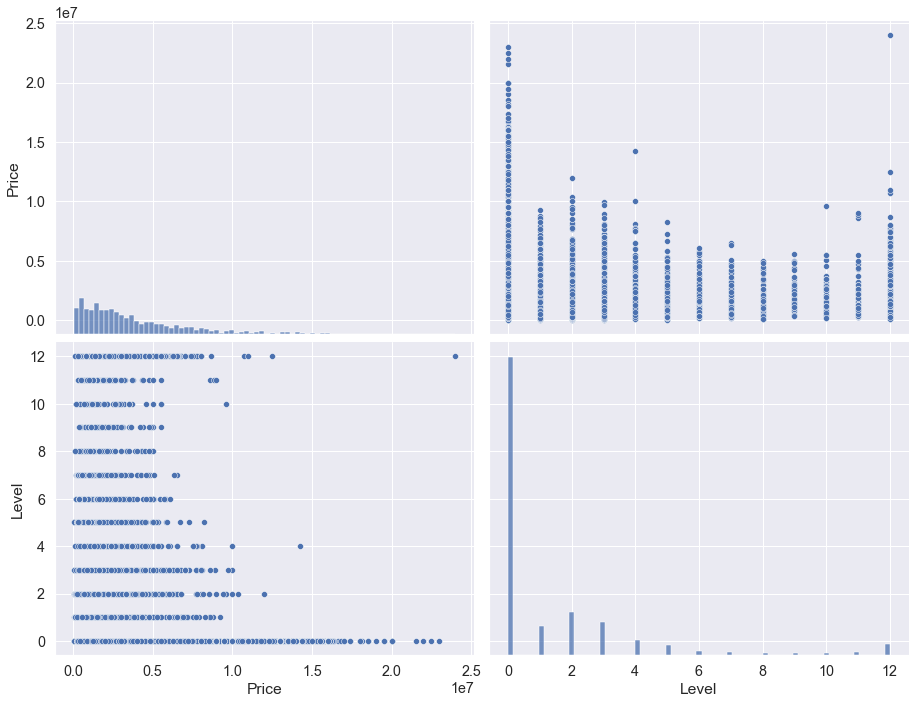

In [67]:
sns.pairplot(df, vars = ['Price', 'Level'], height=5, aspect=1.3);

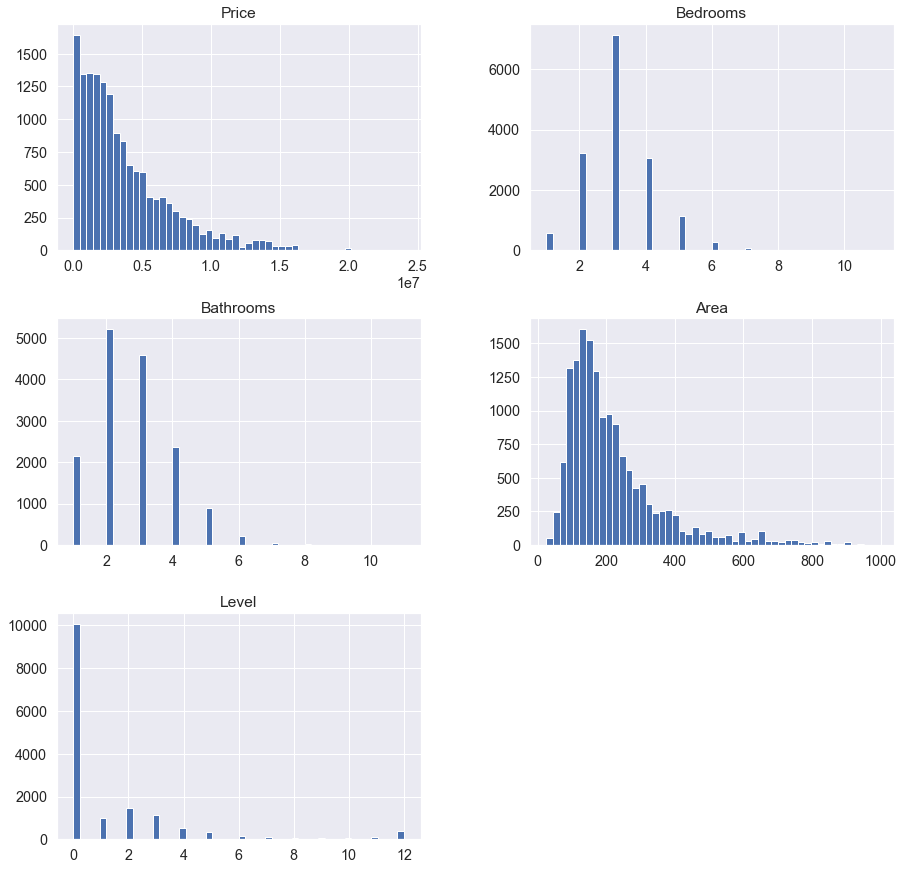

In [68]:
df.hist(bins=50, figsize=(15, 15));

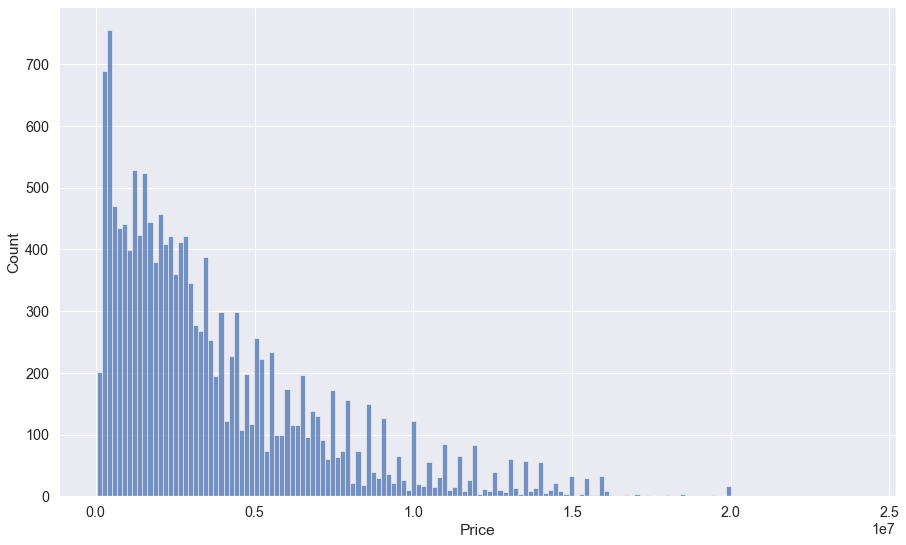

In [69]:
sns.histplot(data=df,x='Price',bins=150);

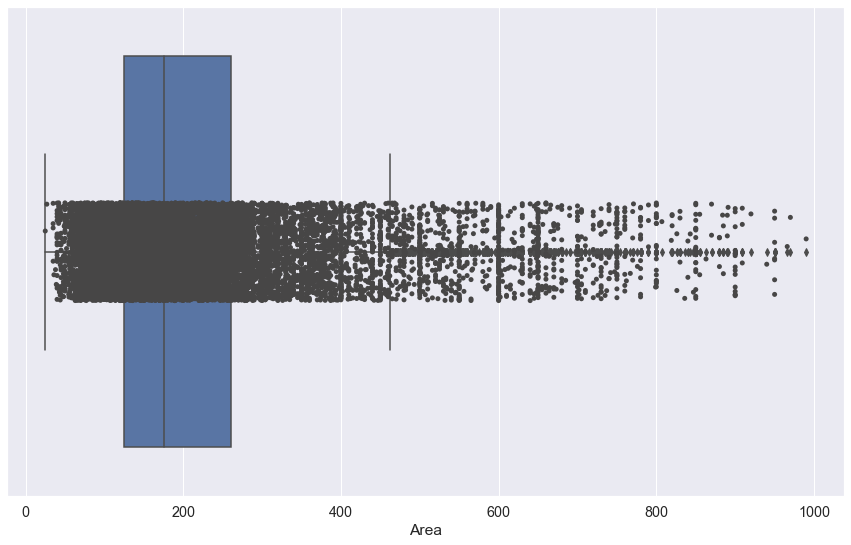

In [70]:
sns.boxplot(x='Area', data=df)
sns.stripplot(x='Area', data=df, color="#474646");

<AxesSubplot:xlabel='Area', ylabel='Count'>

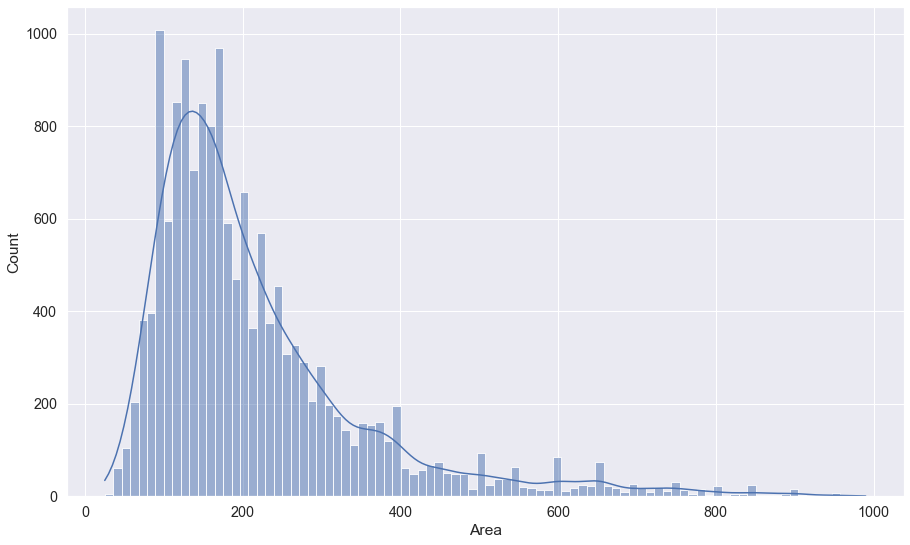

In [71]:
sns.histplot(data = df, x ='Area', kde = True)

In [72]:
df.corr()

,Price,Bedrooms,Bathrooms,Area,Level
Price,1.000000,0.517998,0.634419,0.679450,-0.221371
Bedrooms,0.517998,1.000000,0.795706,0.721151,-0.129539
Bathrooms,0.634419,0.795706,1.000000,0.741674,-0.206948
Area,0.679450,0.721151,0.741674,1.000000,-0.166355
Level,-0.221371,-0.129539,-0.206948,-0.166355,1.000000


In [73]:
df = pd.get_dummies(df, columns = ['Type', 'Furnished','City' ,'Payment_Option','Delivery_Term'])
X = df.drop(columns = ['Price','Price Range'])
y = df[['Price']]

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True ,random_state = 404)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11634, 106), (3879, 106), (11634, 1), (3879, 1))

In [75]:
def performance (model, X_train, y_train, y_pred, y_test):
    print('Training Score :', model.score(X_train, y_train))
    print('Testing Score :', r2_score(y_test, y_pred))
    print('Other Metrics In Testing Data')
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))

In [76]:
#Fitting Linear Regression
Lr = LinearRegression()
Lr.fit(X_train, y_train)
#predicting the data
Lr_pred = Lr.predict(X_test)


In [77]:
X_test.head(1)

,Bedrooms,Bathrooms,Area,Level,Type_Apartment,Type_Chalet,Type_Duplex,Type_Penthouse,Type_Standalone Villa,Type_Studio,...,City_Zamalek,City_Zezenia,Payment_Option_Cash,Payment_Option_Cash or Installment,Payment_Option_Installment,Payment_Option_Unknown Payment,Delivery_Term_Core & Shell,Delivery_Term_Finished,Delivery_Term_Not Finished,Delivery_Term_Semi Finished
5892,3,2,170,5,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [78]:
Lr.predict(X_test.head(1))

array([[1819165.7109375]])

In [79]:
performance(Lr, X_train, y_train, Lr_pred, y_test)

Training Score : 0.6227419924699757
Testing Score : 0.617098275555237
Other Metrics In Testing Data
MSE: 4193945791631.9844
MAE: 1465341.4801817478


In [80]:
#Fitting decision Tree model regrission
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
#the predicted data
dt_pred = dt.predict(X_test)

In [81]:
performance(dt, X_train, y_train, dt_pred, y_test)

Training Score : 0.9744994894466235
Testing Score : 0.5407087638765358
Other Metrics In Testing Data
MSE: 5030644742242.032
MAE: 1357559.9815746786


In [82]:
#Fitting random forest model regrission
rf = RandomForestRegressor()
rf.fit(X_train, y_train.values.ravel())
#the predicted data
rf_pred = rf.predict(X_test)

In [83]:
#the performance
performance(rf, X_train, y_train, rf_pred, y_test)

Training Score : 0.9414165262553843
Testing Score : 0.7081923960174334
Other Metrics In Testing Data
MSE: 3196186369919.17
MAE: 1155782.9419453035


Best Estimator: DecisionTreeRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=14)
Best params: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 14}
Training Score : 0.758702351734516
Testing Score : 0.6648789274621532
Other Metrics In Testing Data
MSE: 3670601415795.015
MAE: 1309078.4765189635


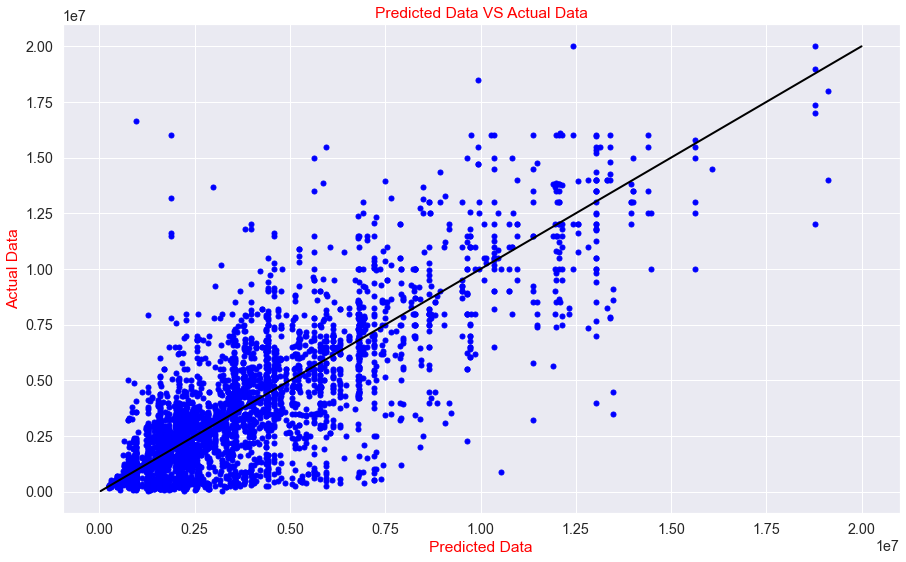

In [84]:
params = [{'max_depth': list(range(5,20)), 'min_samples_split': list(range(2,15)), 'min_samples_leaf':[2,3,4]}]
grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = params, cv = 10, n_jobs = -1)
#Fitting the model
grid_search.fit(X_train, y_train)
#The best estimator
print('Best Estimator:', grid_search.best_estimator_)
#the best parameters
print('Best params:', grid_search.best_params_)
#the predicted data
grid_pred = grid_search.predict(X_test)
#Decision tree performance after tuning
performance(grid_search, X_train, y_train, grid_pred, y_test)
#Plotting the results
plt.scatter(grid_pred, y_test, c='blue', marker = 'o', s = 25)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c= 'black', lw = 2)
plt.xlabel('Predicted Data', c = 'red')
plt.ylabel('Actual Data', c = 'red')
plt.title('Predicted Data VS Actual Data', c = 'red')
plt.show()

In [85]:
params = [{'n_estimators':[100,200,300] ,'max_depth': list(range(5,20)), 'min_samples_split': list(range(2,15)), 'min_samples_leaf':[2,3,4]}]
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = params, cv = 10, n_jobs = -1)
#Fitting the model
grid_search.fit(X_train, y_train)
#The best estimator
print('Best Estimator:', grid_search.best_estimator_)
#the best parameters
print('Best params:', grid_search.best_params_)
#the predicted data
grid_pred = grid_search.predict(X_test)
#Decision tree performance after tuning
performance(grid_search, X_train, y_train, grid_pred, y_test)
#Plotting the results
plt.scatter(grid_pred, y_test, c='blue', marker = 'o', s = 25)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c= 'black', lw = 2)
plt.xlabel('Predicted Data', c = 'red')
plt.ylabel('Actual Data', c = 'red')
plt.title('Predicted Data VS Actual Data', c = 'red')
plt.show()

KeyboardInterrupt: 